In [1]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots_from_df(df):
    num_cols = 2
    num_features = df.shape[1]
    num_rows = (num_features + 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    for i, feature in enumerate(df.columns):
        sns.boxplot(x=df[feature], ax=axs[i]) 
        axs[i].set_title("Boxplot of " + feature)
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

def show_countplots_by_target(df, columns, target_column_name):
    num_cols = 2
    num_features = len(columns)
    num_rows = (num_features + 1) // num_cols
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    # Use a for loop to loop over each feature and create a countplot
    for i, feature in enumerate(columns):
        sns.countplot(x=feature, data=df, hue=target_column_name, ax=axs[i])
        axs[i].set_title(f"Countplot of {feature} by {target_column_name}")
        axs[i].set_ylabel('')
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

In [2]:
if not os.path.exists("./data_validation.csv"):
    data_frame = pd.read_csv("../../dataset/data-ori.csv")
    df_train, df_validation = train_test_split(
        data_frame,
        test_size=0.10,
        stratify=data_frame['SOURCE'],
    )
    
    df_train.to_csv("./data_train.csv", index=False)
    df_validation.to_csv("./data_validation.csv", index=False)

In [3]:
df_numerical=df_validation.loc[:,['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']]
df_categorical=df_validation.loc[:,['SEX','SOURCE']]

print("Data set shape: ",df_validation.shape)
print("Number of Duplicates: ",df_validation.duplicated().sum())
print("Nmber of NaN:", df_validation.isna().sum().sum())
print("\nData Info:")
df_validation.info()
print("\nData Head:")
df_validation.head()

Data set shape:  (442, 11)
Number of Duplicates:  0
Nmber of NaN: 0

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 555 to 2032
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   442 non-null    float64
 1   HAEMOGLOBINS  442 non-null    float64
 2   ERYTHROCYTE   442 non-null    float64
 3   LEUCOCYTE     442 non-null    float64
 4   THROMBOCYTE   442 non-null    int64  
 5   MCH           442 non-null    float64
 6   MCHC          442 non-null    float64
 7   MCV           442 non-null    float64
 8   AGE           442 non-null    int64  
 9   SEX           442 non-null    object 
 10  SOURCE        442 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 41.4+ KB

Data Head:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
555,44.1,15.7,5.37,18.7,353,29.2,35.6,82.1,21,M,out
3910,30.1,9.9,3.48,12.3,185,28.4,32.9,86.5,73,M,in
4293,29.0,9.6,3.02,4.6,90,31.8,33.1,96.0,84,M,in
2637,40.8,14.3,4.56,6.2,286,31.4,35.0,89.5,55,M,out
2649,37.1,12.7,4.30,2.6,96,29.5,34.2,86.3,55,F,in


In [4]:
df_validation.nunique().to_frame('Unqiue Values')

,Unqiue Values
HAEMATOCRIT,195
HAEMOGLOBINS,93
ERYTHROCYTE,239
LEUCOCYTE,149
THROMBOCYTE,264
MCH,101
MCHC,59
MCV,197
AGE,91
SEX,2


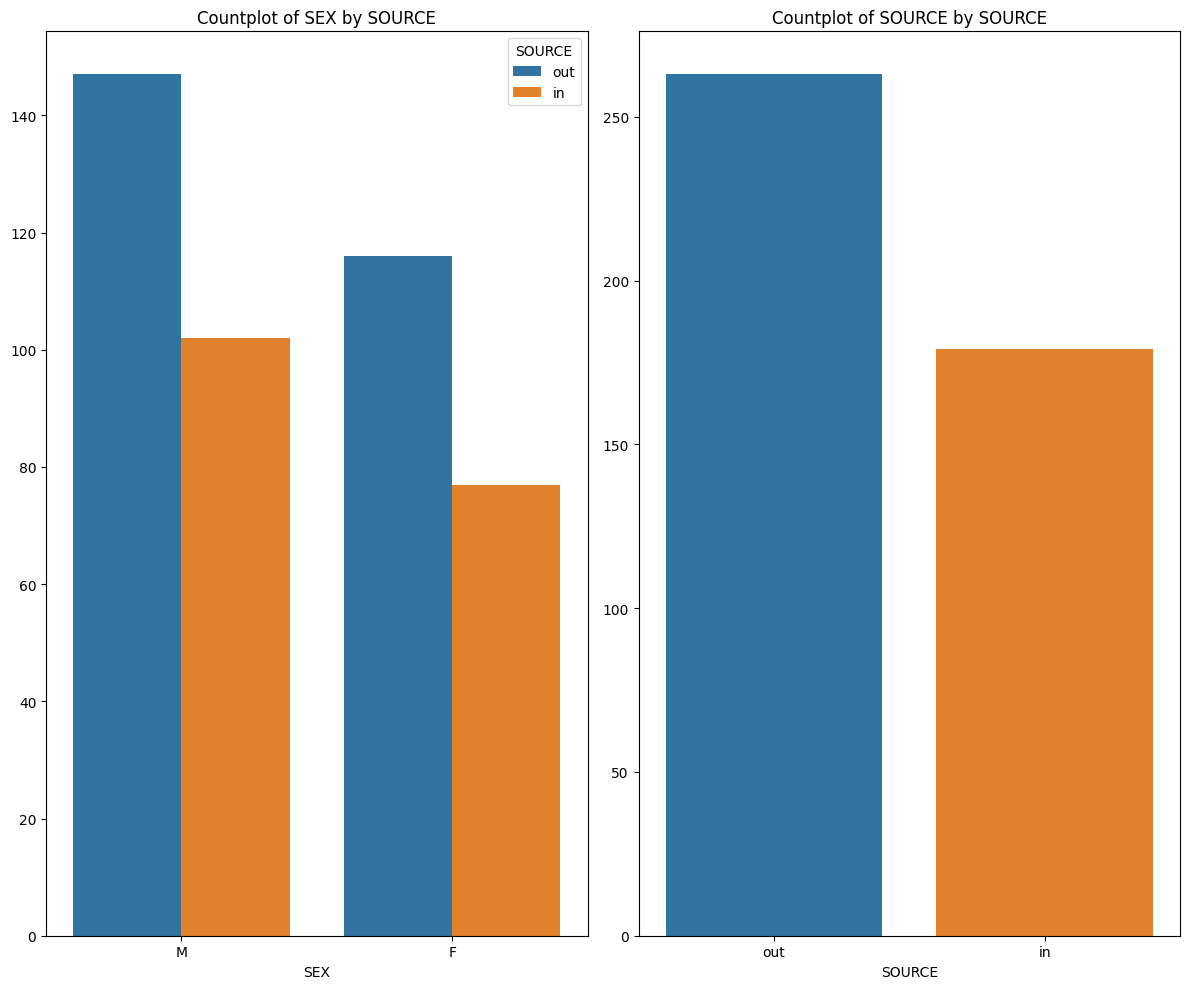

In [5]:
show_countplots_by_target(df_categorical, df_categorical.columns, "SOURCE")

In [6]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
HAEMATOCRIT,442.0,38.315611,6.342221,13.70,34.30,39.35,42.7000,56.00
HAEMOGLOBINS,442.0,12.807692,2.200522,4.40,11.40,13.20,14.4000,17.10
ERYTHROCYTE,442.0,4.531131,0.811979,1.48,4.02,4.63,5.0875,7.57
LEUCOCYTE,442.0,8.747285,5.308506,1.90,5.50,7.60,10.4000,60.80
THROMBOCYTE,442.0,251.022624,120.283299,12.00,171.75,244.00,318.0000,910.00
MCH,442.0,28.395928,2.394766,14.90,27.10,28.70,29.8000,35.70
MCHC,442.0,33.398869,1.150953,27.50,32.70,33.50,34.2000,37.30
MCV,442.0,84.999548,6.469787,54.00,81.90,85.20,88.7750,104.70
AGE,442.0,48.020362,22.167923,1.00,30.00,49.00,65.7500,98.00


array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>]],
      dtype=object)

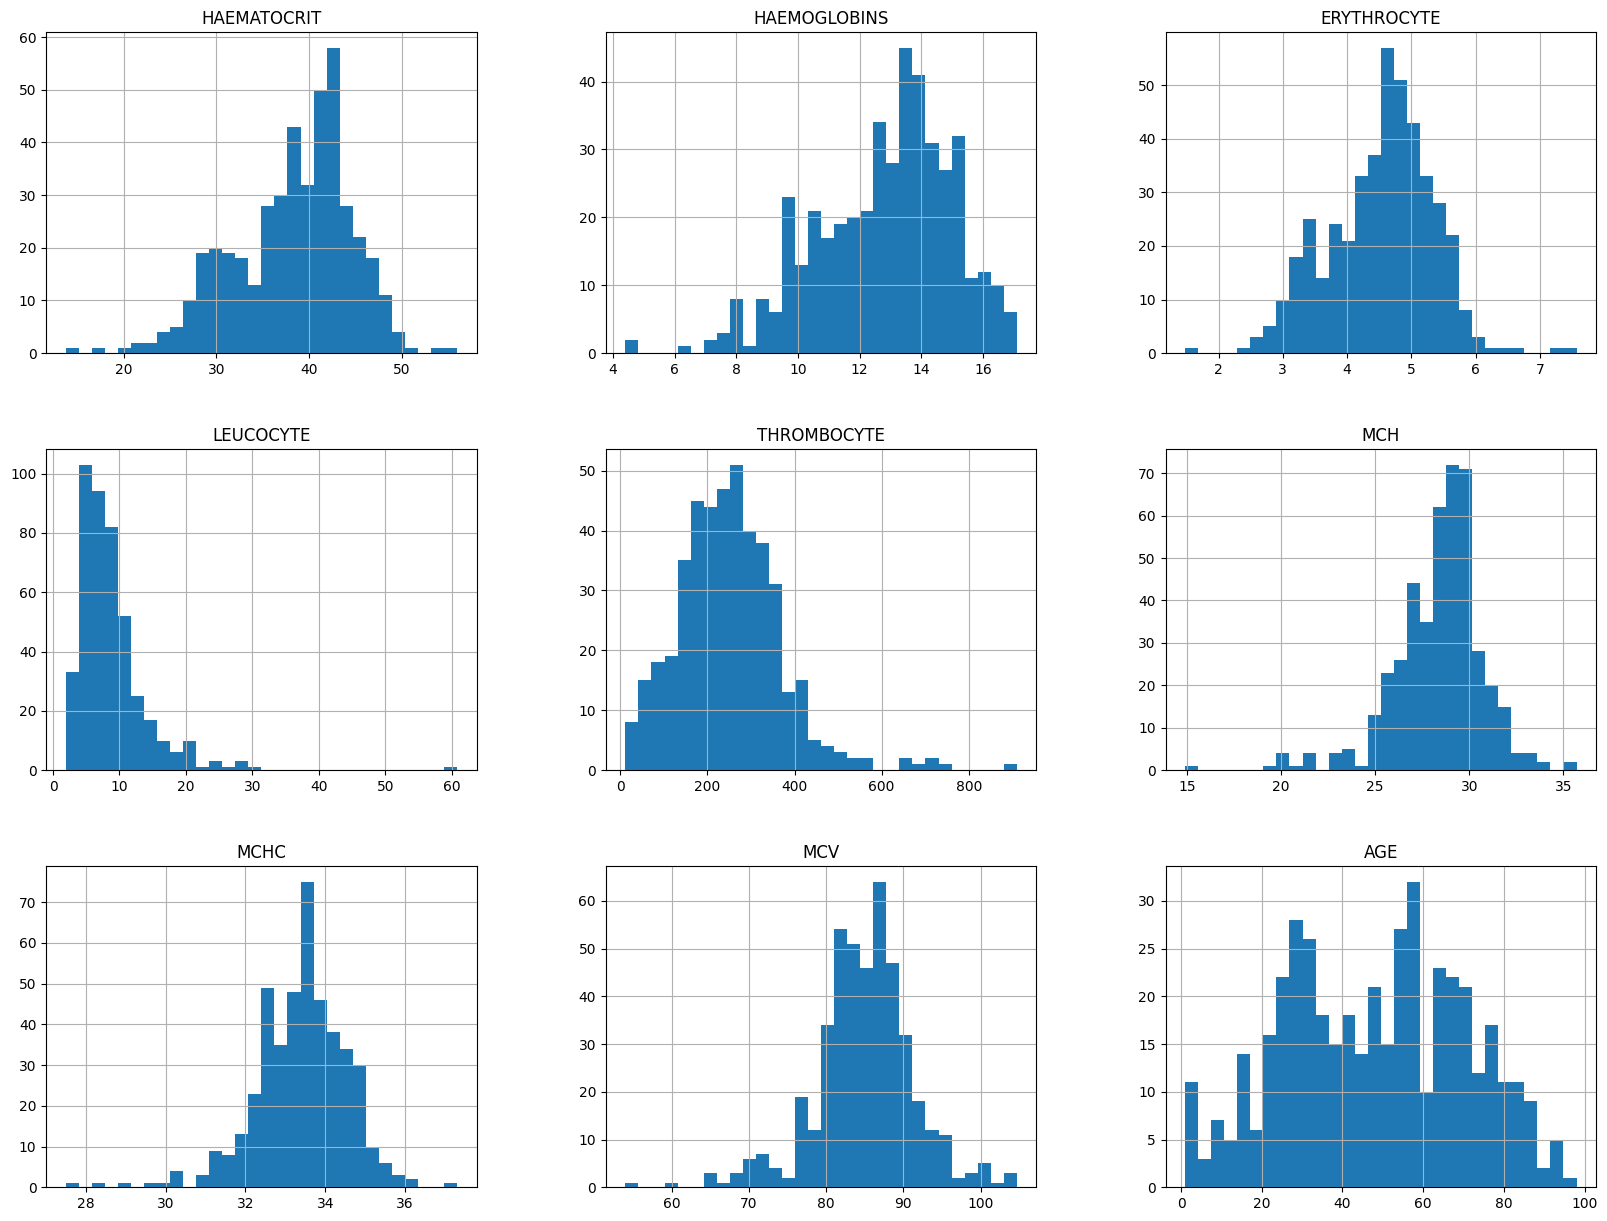

In [7]:
df_numerical.hist(bins=30, figsize=(20,15))

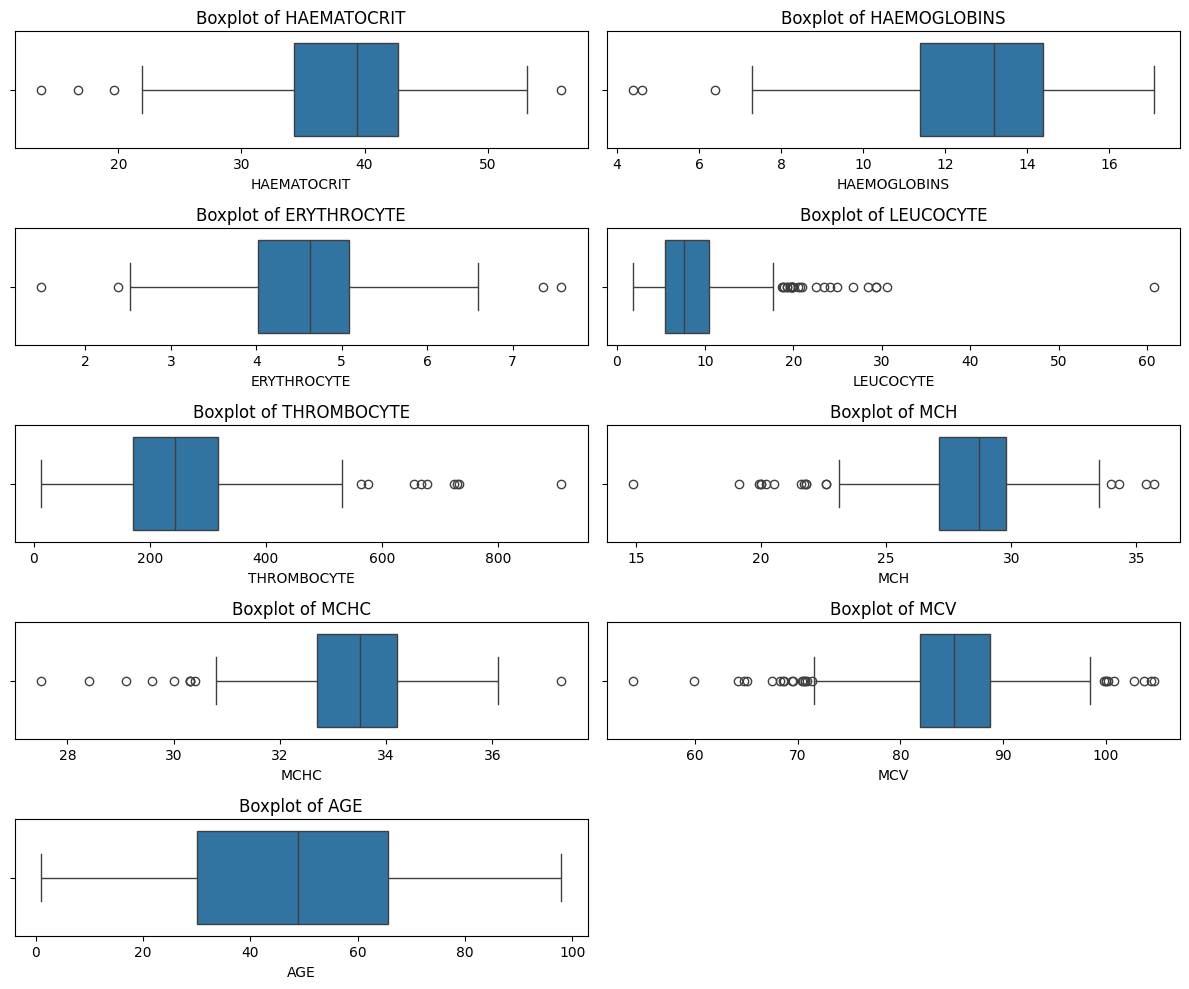

In [8]:
create_boxplots_from_df(df_numerical)

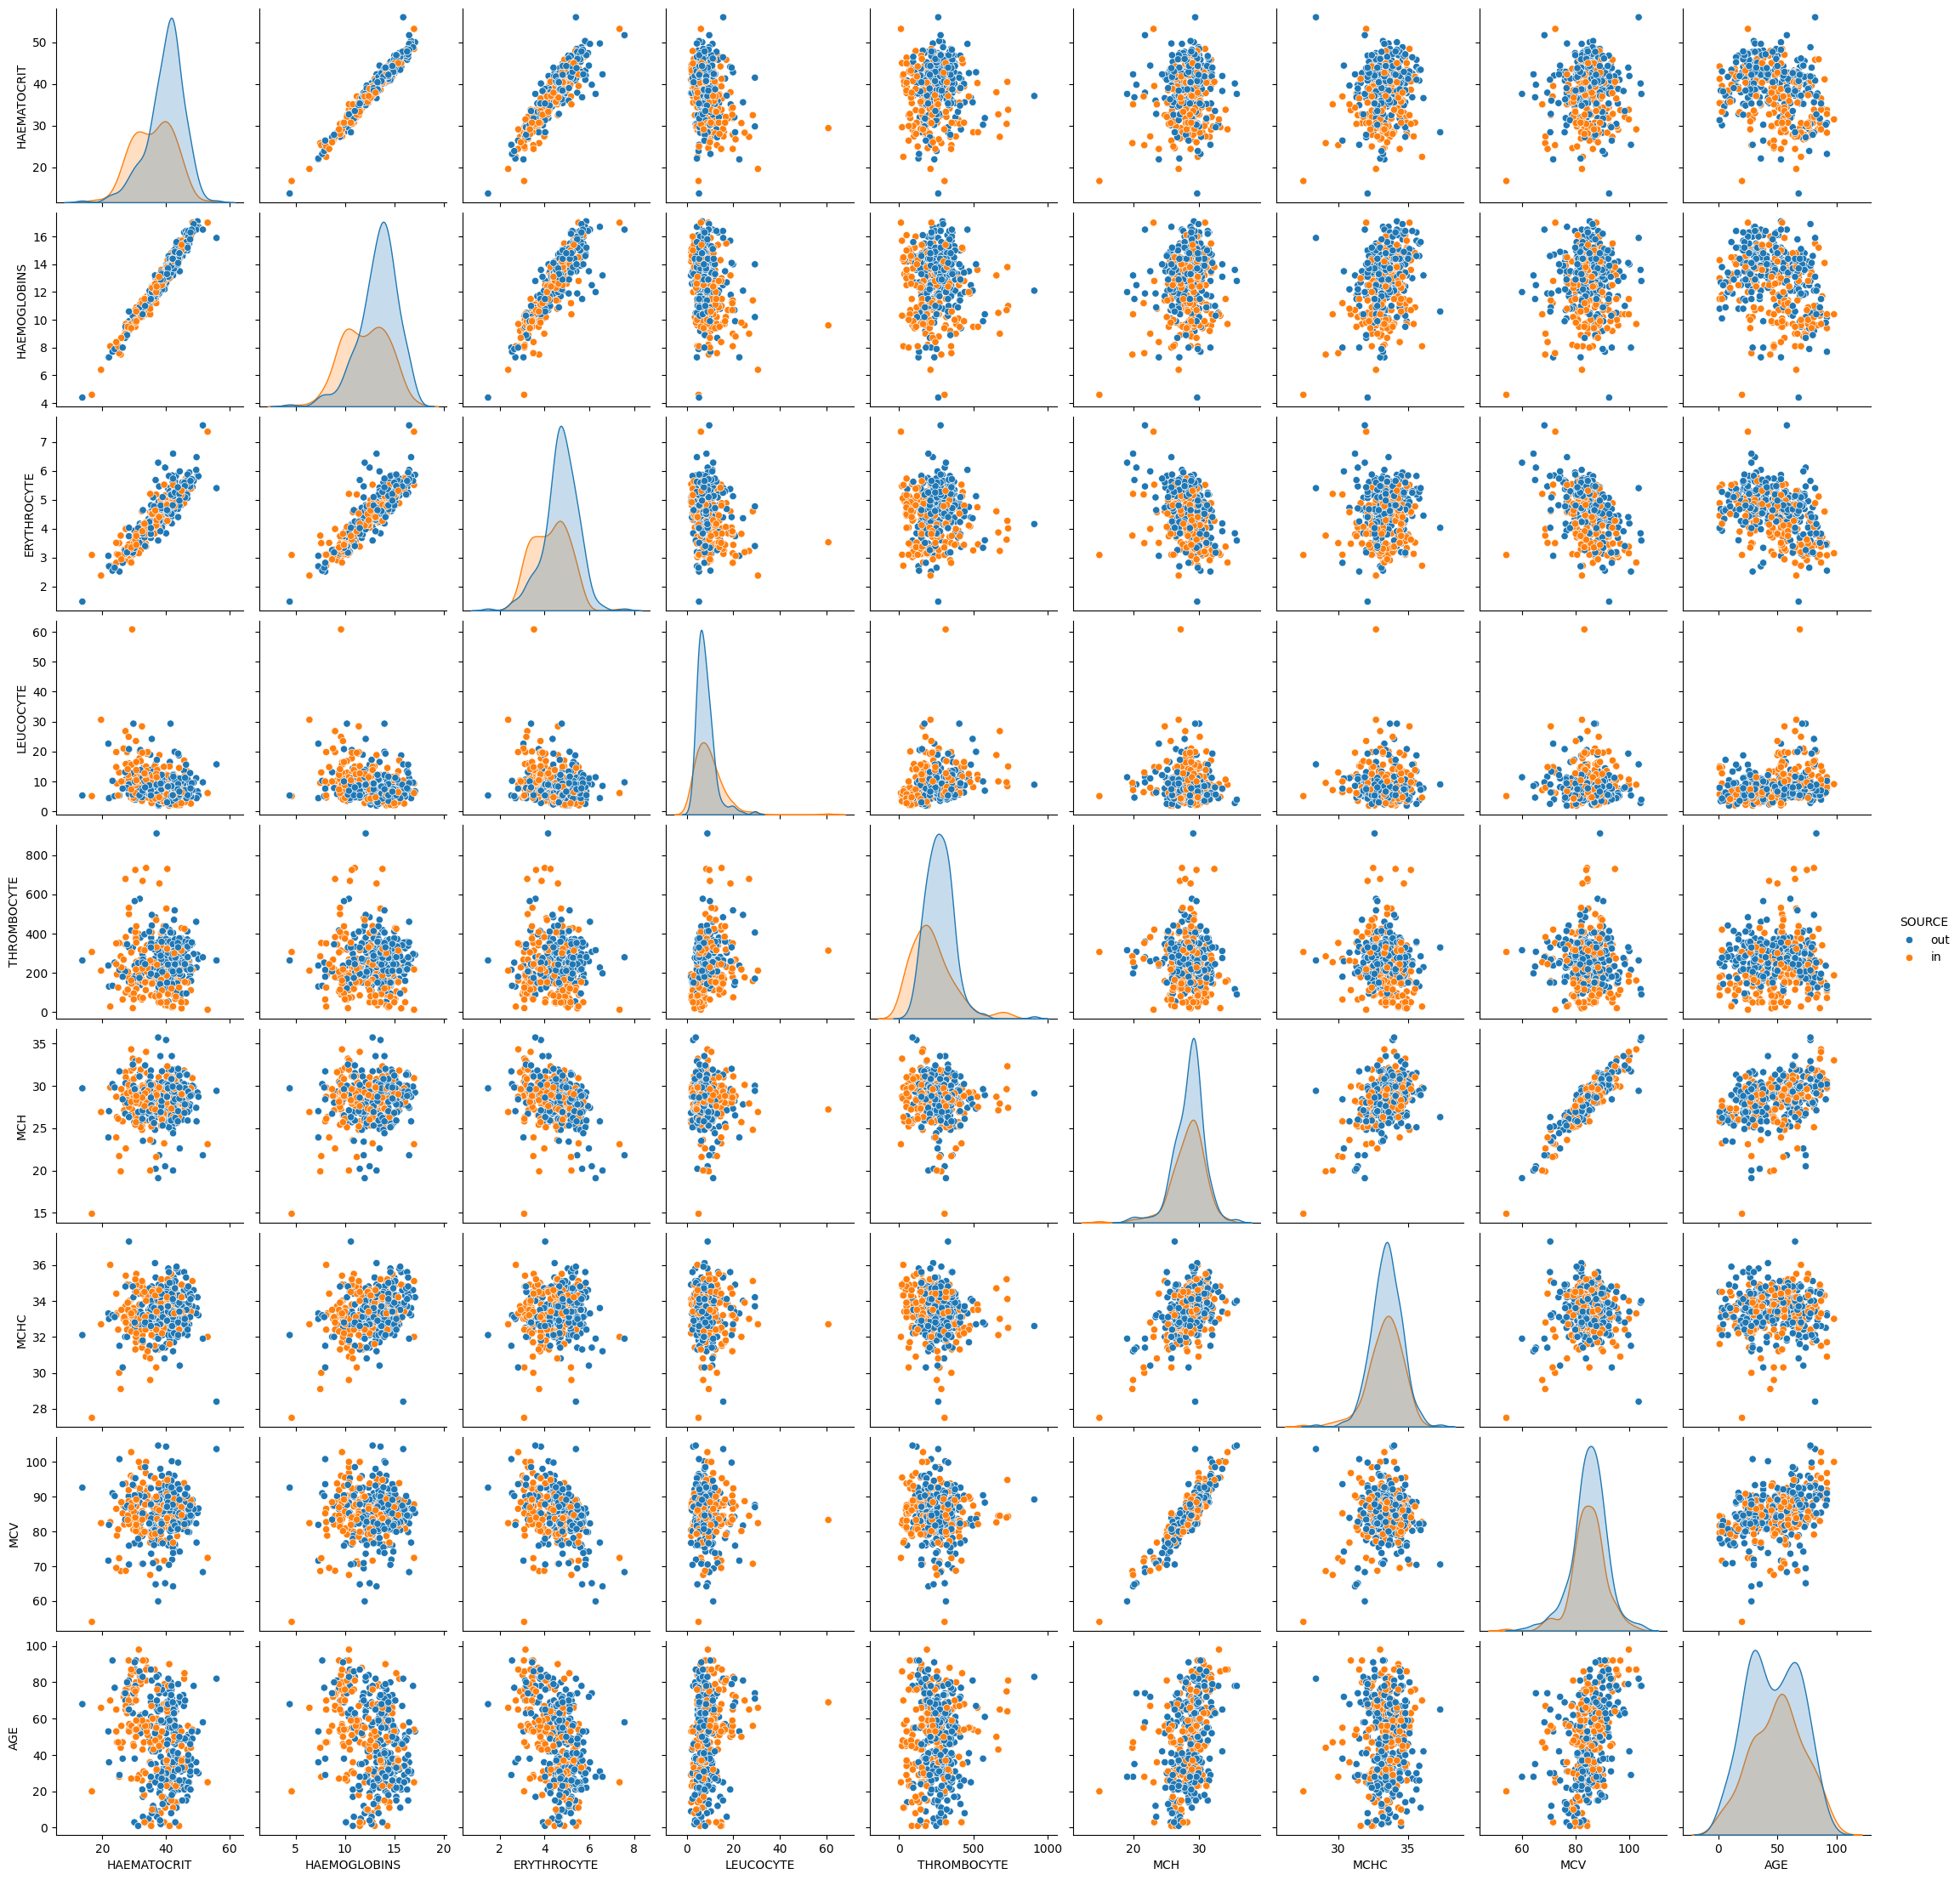

In [9]:
sns.pairplot(df_validation, hue='SOURCE')

In [10]:
numerical_correlation_mt = df_numerical.corr()
numerical_correlation_mt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.980904,0.900508,-0.291485,0.012201,0.094828,0.141793,0.050152,-0.274816
HAEMOGLOBINS,0.980904,1.000000,0.876454,-0.291933,-0.010924,0.177522,0.326043,0.059699,-0.277150
ERYTHROCYTE,0.900508,0.876454,1.000000,-0.254362,0.018904,-0.304346,0.083391,-0.376766,-0.412775
LEUCOCYTE,-0.291485,-0.291933,-0.254362,1.000000,0.262472,-0.063810,-0.045938,-0.047462,0.252168
THROMBOCYTE,0.012201,-0.010924,0.018904,0.262472,1.000000,-0.086700,-0.122385,-0.042884,0.047805
MCH,0.094828,0.177522,-0.304346,-0.063810,-0.086700,1.000000,0.476547,0.917974,0.342049
MCHC,0.141793,0.326043,0.083391,-0.045938,-0.122385,0.476547,1.000000,0.092884,-0.038029
MCV,0.050152,0.059699,-0.376766,-0.047462,-0.042884,0.917974,0.092884,1.000000,0.399831
AGE,-0.274816,-0.277150,-0.412775,0.252168,0.047805,0.342049,-0.038029,0.399831,1.000000


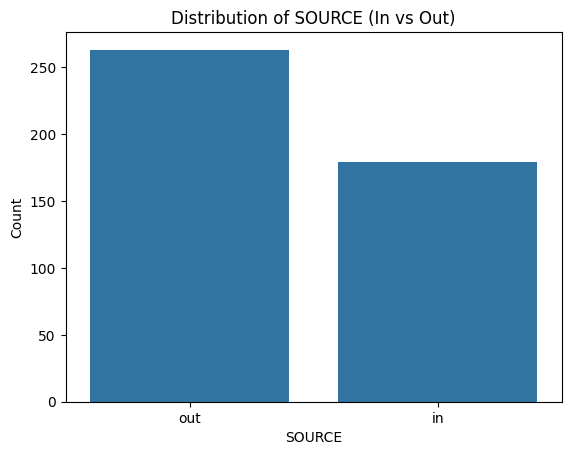

In [11]:
sns.countplot(x=df_validation['SOURCE'])
plt.title("Distribution of SOURCE (In vs Out)")
plt.xlabel("SOURCE")
plt.ylabel("Count")
plt.show()

In [12]:
source_counts = df_validation['SOURCE'].value_counts()
source_proportions = df_validation['SOURCE'].value_counts(normalize=True)
print("Counts of 'SOURCE':\n", source_counts)
print("\nProportions of 'SOURCE':\n", source_proportions)

Counts of 'SOURCE':
 SOURCE
out    263
in     179
Name: count, dtype: int64

Proportions of 'SOURCE':
 SOURCE
out    0.595023
in     0.404977
Name: proportion, dtype: float64
